In [85]:
using CSV, DataFrames, GLM, RegressionTables, Gadfly

In [2]:
# Enable printing of 1000 columns
ENV["COLUMNS"] = 1000

1000

# Reading the Data

In [3]:
fb_data = CSV.read("dataset_Facebook.csv", DataFrame)

500×19 DataFrame
 Row │ Page total likes  Type     Category  Post Month  Post Weekday  Post Hour  Paid     Lifetime Post Total Reach  Lifetime Post Total Impressions  Lifetime Engaged Users  Lifetime Post Consumers  Lifetime Post Consumptions  Lifetime Post Impressions by people who have liked your Page  Lifetime Post reach by people who like your Page  Lifetime People who have liked your Page and engaged with your post  comment  like    share   Total Interactions 
     │ Int64             String7  Int64     Int64       Int64         Int64      Int64?   Int64                      Int64                            Int64                   Int64                    Int64                       Int64                                                         Int64                                             Int64                                                                Int64    Int64?  Int64?  Int64              
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │           139441  Photo           2          12             4          3        0                       2752                             5091                     178                      109                         159                                                          3078                                              1640                                                                  119        4      79      17                 100
   2 │           139441  Status          2          12             3         10        0                      10460                            19057                    1457                     1361                        1674                                                         11710                                              6112                                                                 1108        5     130      29                 164
   3 │           139441  Photo           3          12             3          3        0                       2413                             4373                     177                      113                         154                                                          2812                                              1503                                                                  132        0      66      14                  80
   4 │           139441  Photo           2          12             2         10        1                      50128                            87991                    2211                      790                        1119                                                         61027                                             32048                                                                 1386       58    1572     147                1777
   5 │           139441  Photo           2          12             2          3        0                       7244                            13594                     671                      410                         580                                                          6228                                              3200                                                                  396       19     325      49                 393
   6 │           139441  Status          2          12             1          9        0                      10472                            20849                    1191                     1073                        1389                                                         16034                                              7852                           

In [4]:
println(size(fb_data))

(500, 19)


In [5]:
names(fb_data)

19-element Vector{String}:
 "Page total likes"
 "Type"
 "Category"
 "Post Month"
 "Post Weekday"
 "Post Hour"
 "Paid"
 "Lifetime Post Total Reach"
 "Lifetime Post Total Impressions"
 "Lifetime Engaged Users"
 "Lifetime Post Consumers"
 "Lifetime Post Consumptions"
 "Lifetime Post Impressions by people who have liked your Page"
 "Lifetime Post reach by people who like your Page"
 "Lifetime People who have liked your Page and engaged with your post"
 "comment"
 "like"
 "share"
 "Total Interactions"

In [7]:
describe(fb_data)

19×7 DataFrame
 Row │ variable                           mean       min    median    max      nmissing  eltype                
     │ Symbol                             Union…     Any    Union…    Any      Int64     Type                  
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Page total likes                   1.23194e5  81370  129600.0  139441          0  Int64
   2 │ Type                                          Link             Video           0  String7
   3 │ Category                           1.88       1      2.0       3               0  Int64
   4 │ Post Month                         7.038      1      7.0       12              0  Int64
   5 │ Post Weekday                       4.15       1      4.0       7               0  Int64
   6 │ Post Hour                          7.84       1      9.0       23              0  Int64
   7 │ Paid                               0.278557   0      0.0       1               1  Union{Missing, Int64}
   8 │ Lifetime Post Total Reach          13903.4    238    5281.0    180480          0  Int64
   9 │ Lifetime Post Total Impressions    29585.9    570    9051.0    1110282         0  Int64
  10 │ Lifetime Engaged Users             920.344    9      625.5     11452           0  Int64
  11 │ Lifetime Post Consumers            798.772    9      551.5     11328           0  Int64
  12 │ Lifetime Post Consumptions         1415.13    9      851.0     19779           0  Int64
  13 │ Lifetime Post Impressions by peo…  16766.4    567    6255.5    1107833         0  Int64
  14 │ Lifetime Post reach by people wh…  6585.49    236    3417.0    51456           0  Int64
  15 │ Lifetime People who have liked y…  609.986    9      412.0     4376            0  Int64
  16 │ comment                            7.482      0      3.0       372             0  Int64
  17 │ like                               177.946    0      101.0     5172            1  Union{Missing, Int64}
  18 │ share                              27.2661    0      19.0      790             4  Union{Missing, Int64}
  19 │ Total Interactions                 212.12     0      123.5     6334            0  Int64

## Handling the Columns with Space

In [8]:
rename!(fb_data, Dict(:"Page total likes" => :"Page_total_likes", 
                      :"Post Month" => :"Post_Month", 
                      :"Post Hour" => :"Post_Hour", 
                      :"Post Weekday" => :"Post_Weekday"));

In [9]:
names(fb_data)

19-element Vector{String}:
 "Page_total_likes"
 "Type"
 "Category"
 "Post_Month"
 "Post_Weekday"
 "Post_Hour"
 "Paid"
 "Lifetime Post Total Reach"
 "Lifetime Post Total Impressions"
 "Lifetime Engaged Users"
 "Lifetime Post Consumers"
 "Lifetime Post Consumptions"
 "Lifetime Post Impressions by people who have liked your Page"
 "Lifetime Post reach by people who like your Page"
 "Lifetime People who have liked your Page and engaged with your post"
 "comment"
 "like"
 "share"
 "Total Interactions"

In [10]:
dropmissing!(fb_data, :"like");
dropmissing!(fb_data, :"Paid");
describe(fb_data)

19×7 DataFrame
 Row │ variable                           mean      min    median    max      nmissing  eltype                
     │ Symbol                             Union…    Any    Union…    Any      Int64     Type                  
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Page_total_likes                   123251.0  81370  129600.0  139441          0  Int64
   2 │ Type                                         Link             Video           0  String7
   3 │ Category                           1.88153   1      2.0       3               0  Int64
   4 │ Post_Month                         7.04418   1      7.0       12              0  Int64
   5 │ Post_Weekday                       4.14659   1      4.0       7               0  Int64
   6 │ Post_Hour                          7.84739   1      9.0       23              0  Int64
   7 │ Paid                               0.279116  0      0.0       1               0  Int64
   8 │ Lifetime Post Total Reach          13948.3   238    5286.0    180480          0  Int64
   9 │ Lifetime Post Total Impressions    29685.8   570    9067.5    1110282         0  Int64
  10 │ Lifetime Engaged Users             922.833   9      626.0     11452           0  Int64
  11 │ Lifetime Post Consumers            800.853   9      554.5     11328           0  Int64
  12 │ Lifetime Post Consumptions         1419.22   9      854.5     19779           0  Int64
  13 │ Lifetime Post Impressions by peo…  16822.1   567    6268.5    1107833         0  Int64
  14 │ Lifetime Post reach by people wh…  6605.36   236    3444.0    51456           0  Int64
  15 │ Lifetime People who have liked y…  611.735   9      413.5     4376            0  Int64
  16 │ comment                            7.51205   0      3.0       372             0  Int64
  17 │ like                               178.12    0      101.0     5172            0  Int64
  18 │ share                              27.2646   0      19.0      790             3  Union{Missing, Int64}
  19 │ Total Interactions                 212.733   0      124.5     6334            0  Int64

# 1. Multiple Regression Model

## (a) Fit the Model

In [11]:
m1 = @formula(like~Category+Page_total_likes+Type+Post_Month+Post_Hour+Post_Weekday+Paid+comment)

FormulaTerm
Response:
  like(unknown)
Predictors:
  Category(unknown)
  Page_total_likes(unknown)
  Type(unknown)
  Post_Month(unknown)
  Post_Hour(unknown)
  Post_Weekday(unknown)
  Paid(unknown)

In [12]:
model1 = lm(m1, fb_data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

like ~ 1 + Category + Page_total_likes + Type + Post_Month + Post_Hour + Post_Weekday + Paid

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────────
                          Coef.    Std. Error      t  Pr(>|t|)     Lower 95%     Upper 95%
──────────────────────────────────────────────────────────────────────────────────────────
(Intercept)       -267.7         246.122       -1.09    0.2773  -751.29       215.889
Category            46.457        17.6954       2.63    0.0089    11.6885      81.2255
Page_total_likes     0.00336074    0.00268798   1.25    0.2118    -0.0019207    0.00864218
Type: Photo         52.9588       73.0099       0.73    0.4686   -90.4938     196.411
Type: Status        43.2883       87.0151       0.50    0.6191  -127.682      214.259
Type:

## R-Squared Values

In [25]:
# R Square value of the model
r2(model1)

0.042071442280440574

## Coefficient Significance

In [77]:
coef(model1)

10-element Vector{Float64}:
 -267.7003837275479
   46.45699105908563
    0.0033607409588071262
   52.95884241123836
   43.28834889677651
  104.72372803875996
  -11.400559258659847
   -0.09419406633059044
  -11.344900764993815
   78.14843919417183

## (b) Refit with Logarithm Transformation

In [64]:
m1_log = @formula(log1p(like)~Category+log1p(Page_total_likes)+Type+Post_Month+Post_Hour+Post_Weekday+Paid)
model1_log = lm(mm, fb_data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

:(log1p(like)) ~ 1 + Category + :(log1p(Page_total_likes)) + Type + Post_Month + Post_Hour + Post_Weekday + Paid

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────────
                              Coef.  Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────────────────
(Intercept)              -9.38528    10.6037     -0.89    0.3765  -30.2198     11.4492
Category                  0.419246    0.0613483   6.83    <1e-10    0.298707    0.539786
log1p(Page_total_likes)   1.1345      0.931547    1.22    0.2239   -0.695838    2.96484
Type: Photo               0.419936    0.253008    1.66    0.0976   -0.0771832   0.917056
Type: Status              0.708185    0.301614    2.35    0.0193    

In [75]:
# R Square value of the model
r2(model1_log)

0.15489106800613017

In [76]:
coef(model1_log)

10-element Vector{Float64}:
 -9.385281112309091
  0.41924626484301625
  1.1345002509845123
  0.4199363731235755
  0.7081849624272468
  1.3867668296245068
 -0.039586919429071776
 -0.01544474247772375
 -0.0629514488613139
  0.3030827750452996

In [ ]:
plot!()

##  Models Dignostics

In [65]:
regtable(model1, model1_log)


-------------------------------------------------
                             like     log1p(like)
                          ---------   -----------
                                (1)           (2)
-------------------------------------------------
(Intercept)                -267.700        -9.385
                          (246.122)      (10.604)
Category                   46.457**      0.419***
                           (17.695)       (0.061)
Page_total_likes              0.003              
                            (0.003)              
Type: Photo                  52.959         0.420
                           (73.010)       (0.253)
Type: Status                 43.288        0.708*
                           (87.015)       (0.302)
Type: Video                 104.724       1.387**
                          (140.946)       (0.489)
Post_Month                  -11.401        -0.040
                           (13.298)       (0.041)
Post_Hour                    -0.094        -0.015

In [89]:
# predicted values
pred1 = predict(model1_log)
# residuals
red1 = fb_data[!, :like] - pred1;

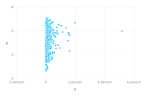

In [79]:
# homoscedasticity Assumption 
plot(x=red1,y=pred1, Geom.point)

#### Here the variance is not same in different X value, so homoscedasticity assumption is not OK

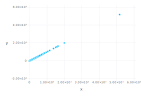

In [80]:
# Exogeneity assumption
plot(x = fb_data[!, :like], y=red1)

### We observed some pattern over the plot, so the Epsilon captured some information with was left out previously. It violating the assumption & might missed some idependent varaiable

### Adding Some more varaiable for Observing the Diagnostic Changes in the Model

In [90]:
rename!(fb_data, Dict(:"Total Interactions" => :"Total_Interactions"));

In [94]:
m1_test = @formula(log1p(like)~Category+log1p(Page_total_likes)+Type+Post_Month+Post_Hour+Post_Weekday+Paid+Total_Interactions)
model1_test = lm(m1_test, fb_data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

:(log1p(like)) ~ 1 + Category + :(log1p(Page_total_likes)) + Type + Post_Month + Post_Hour + Post_Weekday + Paid + Total_Interactions

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────────
                               Coef.   Std. Error      t  Pr(>|t|)     Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)              -2.96025     8.69833      -0.34    0.7338  -20.0511      14.1307
Category                  0.327517    0.0506153     6.47    <1e-09    0.228066     0.426968
log1p(Page_total_likes)   0.5646      0.764178      0.74    0.4604   -0.936893     2.06609
Type: Photo               0.307079    0.207438      1.48    0.1394   -0.100505     0.714662
Type: Status              

In [106]:
# predicted values
pred1_test = predict(model1_test)
# residuals
red1_test = fb_data[!, :like] - pred1_test;

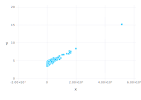

In [107]:
# homoscedasticity Assumption 
plot(x=red1_test, y=pred1_test, Geom.point)

#### We can observed that after adding more variables (not all) the homoscedasticity assumption behavior is varying from the previous

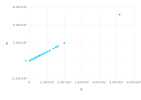

In [97]:
# Exogeneity assumption
plot(x = fb_data[!, :like], y=red1_test)

#### The Exogeneity assumption is not changed from the previous

In [98]:
regtable(model1, model1_log, model1_test)


---------------------------------------------------------
                             like         log1p(like)    
                          ---------   -------------------
                                (1)        (2)        (3)
---------------------------------------------------------
(Intercept)                -267.700     -9.385     -2.960
                          (246.122)   (10.604)    (8.698)
Category                   46.457**   0.419***   0.328***
                           (17.695)    (0.061)    (0.051)
Page_total_likes              0.003                      
                            (0.003)                      
Type: Photo                  52.959      0.420      0.307
                           (73.010)    (0.253)    (0.207)
Type: Status                 43.288     0.708*     0.600*
                           (87.015)    (0.302)    (0.247)
Type: Video                 104.724    1.387**    1.127**
                          (140.946)    (0.489)    (0.401)
Post_Month   

## After doing Logarithm transformation and adding some Extra variable from the dataset the performanace of the Multiple Linear Regression is increasing and some assumptions are really closed to be hold. So, we can assume that doing some appropriate transformation and evaluating assumption after adding variables will be the possible remedy to handle this.

# Dropping Some Variables and Observe the Result

In [103]:
m1_drop = @formula(log1p(like)~Category+Type+Paid+Total_Interactions)
model1_drop = lm(m1_drop, fb_data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

:(log1p(like)) ~ 1 + Category + Type + Paid + Total_Interactions

Coefficients:
────────────────────────────────────────────────────────────────────────────────────
                         Coef.   Std. Error      t  Pr(>|t|)    Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────────────
(Intercept)         3.18087     0.203858     15.60    <1e-44   2.78033     3.58141
Category            0.343752    0.0496054     6.93    <1e-10   0.246287    0.441217
Type: Photo         0.292895    0.203228      1.44    0.1502  -0.106409    0.692198
Type: Status        0.573951    0.241318      2.38    0.0178   0.0998085   1.04809
Type: Video         1.13028     0.39708       2.85    0.0046   0.35009     1.91046
Paid                0.166482    0.0919499     1.81    0.0708  -0.01418

In [104]:
regtable(model1, model1_log, model1_test, model1_drop)


--------------------------------------------------------------------
                             like               log1p(like)         
                          ---------   ------------------------------
                                (1)        (2)        (3)        (4)
--------------------------------------------------------------------
(Intercept)                -267.700     -9.385   3.181***   3.181***
                          (246.122)   (10.604)    (0.204)    (0.204)
Category                   46.457**   0.419***   0.344***   0.344***
                           (17.695)    (0.061)    (0.050)    (0.050)
Page_total_likes              0.003                                 
                            (0.003)                                 
Type: Photo                  52.959      0.420      0.293      0.293
                           (73.010)    (0.253)    (0.203)    (0.203)
Type: Status                 43.288     0.708*     0.574*     0.574*
                           (87.01

In [105]:
# predicted values
pred1_drop = predict(model1_drop)
# residuals
red1_drop = fb_data[!, :like] - pred1_drop;

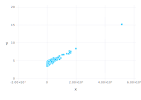

In [108]:
# homoscedasticity Assumption 
plot(x=red1_drop, y=pred1_drop, Geom.point)

#### After droppoing some variables from the model, we don't find any significant improvement on the basis of  **R2** value and Assumptions. So, directly dropping variables might not be a convenient remedy for the regression problem. Otherwise, fixing is more effective way to handle this

In [118]:
plot(x=red1_test ,Geom.histogram(bincount=10))

## COmputing the Omega matrix
using LinearAlgebra
omega = Diagonal(red1_test.^2)
C=sqrt(omega)
Cinv=inv(C)
weights=diag(Cinv)
# transformed dataset

d = select(fb_data, Not([:Category, :Page_total_likes, :Type, :Post_Month, :Post_Hour, :Post_Weekday, :Paid, :Total_Interactions]))

ystar=Cinv*d
Xstar=Cinv*hcat(ones(50), fb_data[!,:log1p(like)])

LoadError: MethodError: no method matching *(::Diagonal{Float64, Vector{Float64}}, ::DataFrame)
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at C:\Users\ASUS\AppData\Local\Programs\Julia-1.7.1\share\julia\base\operators.jl:655
[0m  *(::AbstractMatrix{T}, [91m::LinearAlgebra.AbstractRotation{S}[39m) where {T, S} at C:\Users\ASUS\AppData\Local\Programs\Julia-1.7.1\share\julia\stdlib\v1.7\LinearAlgebra\src\givens.jl:20
[0m  *(::AbstractMatrix, [91m::Distributions.MvNormal[39m) at C:\Users\ASUS\.julia\packages\Distributions\jFoHB\src\multivariate\mvnormal.jl:292
[0m  ...

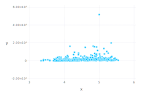

In [88]:
plot(x=pred1_drop, y=red1_drop)

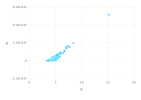

In [99]:
plot(x=pred1_test, y=red1_test)

In [81]:
# checking assumptions
r = residuals(model1_log)
p = predict(model1_log)

498-element Vector{Float64}:
 4.538578571781252
 4.7816654126021705
 5.0207762854855815
 4.859451047205114
 4.66448146950388
 4.9230130528025215
 5.449761958253509
 4.979384810219283
 4.637972814500981
 4.7238087415575745
 4.655762514879543
 4.367513925575872
 4.367513925575872
 ⋮
 5.049010557463134
 4.547743924473461
 4.671301864295251
 4.595250630857051
 5.021891345724141
 3.399773176908757
 5.03725919595229
 4.535992562962616
 4.659550502784406
 4.2227838809396765
 3.8962060709630033
 4.658647367210836

In [84]:
Pkg.add("Seaborn")

   Resolving package versions...
   Installed Seaborn ────────── v0.4.1
   Installed TableTraitsUtils ─ v1.0.2
   Installed Pandas ─────────── v1.5.3
   Installed PyPlot ─────────── v2.10.0
   Installed PyCall ─────────── v1.93.0
    Updating `C:\Users\ASUS\.julia\environments\v1.7\Project.toml`
  [d2ef9438] + Seaborn v0.4.1
    Updating `C:\Users\ASUS\.julia\environments\v1.7\Manifest.toml`
  [eadc2687] + Pandas v1.5.3
  [438e738f] + PyCall v1.93.0
  [d330b81b] + PyPlot v2.10.0
  [d2ef9438] + Seaborn v0.4.1
  [382cd787] + TableTraitsUtils v1.0.2
    Building PyCall → `C:\Users\ASUS\.julia\scratchspaces\44cfe95a-1eb2-52ea-b672-e2afdf69b78f\71fd4022ecd0c6d20180e23ff1b3e05a143959c2\build.log`
Precompiling project...
  ✓ TableTraitsUtils
  ✓ PyCall
  ✓ Pandas
  ✓ PyPlot
  ✓ Seaborn
  5 dependencies successfully precompiled in 233 seconds (242 already precompiled)


In [86]:
# independence
lineplot(r)

LoadError: UndefVarError: lineplot not defined

In [83]:
# heteroscedasticity
scatterplot(p, r)

LoadError: UndefVarError: scatterplot not defined

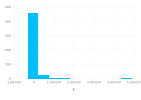

In [16]:

# error distribution
using Gadfly
plot(x=red1,Geom.histogram(bincount=10))

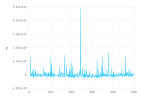

In [17]:
# independence
plot(y=red1,Geom.line)

#### All the observations look random, So the independent assumption hold

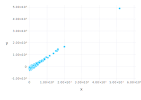

In [18]:
# Exogeneity assumption
plot(x = fb_data[!, :like], y=red1)

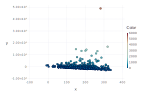

In [19]:
# Homoscedasticity assumption
plot(x=pred1, y=red1)
plot(x=pred1, y=red1,color=fb_data[!, :like])

In [ ]:
# checking assumptions
r3=residuals(m3)
p3=predict(m3)

# linearity
scatterplot(abalone[!,:Length],abalone[!,:binAge])
# normality
histogram(r3)
# independence
lineplot( r3)
# heteroscedasticity
scatterplot(p3,r3)

# fixing heteroscedasticity
var3=p3 .* (1 .- p3)
w= sqrt.(abs.(var3))

## Refit with Logarithm Transformation

In [147]:
fb_data.log_like = log.(fb_data.like);
fb_data.log_Page_total_likes = log.(fb_data.Page_total_likes);

In [148]:
m2 = @formula(log_like~Category+log_Page_total_likes+Type+Post_Month+Post_Hour+Post_Weekday+Paid)

FormulaTerm
Response:
  log_like(unknown)
Predictors:
  Category(unknown)
  log_Page_total_likes(unknown)
  Type(unknown)
  Post_Month(unknown)
  Post_Hour(unknown)
  Post_Weekday(unknown)
  Paid(unknown)

In [149]:
model2 = lm(m2, fb_data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

log_like ~ 1 + Category + log_Page_total_likes + Type + Post_Month + Post_Hour + Post_Weekday + Paid

Coefficients:
────────────────────────────────────────────────────────────────────────────
                      Coef.  Std. Error    t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)             NaN         NaN  NaN       NaN        NaN        NaN
Category                NaN         NaN  NaN       NaN        NaN        NaN
log_Page_total_likes    NaN         NaN  NaN       NaN        NaN        NaN
Type: Photo             NaN         NaN  NaN       NaN        NaN        NaN
Type: Status            NaN         NaN  NaN       NaN        NaN        NaN
Type: Video             NaN         NaN  NaN       NaN        NaN        NaN
Post_Month   

In [100]:
r2(mymodel2)

NaN

In [39]:
size(pred1)

(498,)

In [51]:
# predicted values
pred1 = predict(model1)
# residuals
red1 = fb_data[!, :like] - pred1

498-element Vector{Float64}:
  -85.32862447600101
  -35.34367326221883
 -156.13051630008044
 1307.4924932641536
  137.98157399401134
  -36.12766885853708
  -73.96875702423995
   70.66581196370652
   40.3765713334423
  -74.43645554078489
   90.34612826776879
  -64.32436524669308
  -62.32436524669308
    ⋮
 -146.64873060191044
  155.1742265186972
  -48.57932601194754
  -54.07648017996607
 -106.9784719047826
  129.45144358444975
   -2.6711141124073094
    6.151843008200316
  -66.60170952244441
  -29.757317005723934
   56.13450965537814
  -49.27662663081159

# 2. Repeat Procedure with Another Outcome Variables

In [20]:
m3 = @formula(comment~Category+Page_total_likes+Type+Post_Month+Post_Hour+Post_Weekday+Paid)

FormulaTerm
Response:
  comment(unknown)
Predictors:
  Category(unknown)
  Page_total_likes(unknown)
  Type(unknown)
  Post_Month(unknown)
  Post_Hour(unknown)
  Post_Weekday(unknown)
  Paid(unknown)

In [21]:
model3 = lm(m3, fb_data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

comment ~ 1 + Category + Page_total_likes + Type + Post_Month + Post_Hour + Post_Weekday + Paid

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────────
                          Coef.    Std. Error      t  Pr(>|t|)      Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────────────────
(Intercept)       -15.2456       16.331        -0.93    0.3510  -47.3333       16.8422
Category            0.416881      1.17415       0.36    0.7227   -1.89012       2.72389
Page_total_likes    0.000228579   0.000178356   1.28    0.2006   -0.000121862   0.00057902
Type: Photo         3.01669       4.84445       0.62    0.5338   -6.50187      12.5352
Type: Status        4.92757       5.77374       0.85    0.3938   -6.41689      16.272

In [22]:
m4 = @formula(share~Category+Page_total_likes+Type+Post_Month+Post_Hour+Post_Weekday+Paid)

FormulaTerm
Response:
  share(unknown)
Predictors:
  Category(unknown)
  Page_total_likes(unknown)
  Type(unknown)
  Post_Month(unknown)
  Post_Hour(unknown)
  Post_Weekday(unknown)
  Paid(unknown)

In [23]:
model4 = lm(m4, fb_data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

share ~ 1 + Category + Page_total_likes + Type + Post_Month + Post_Hour + Post_Weekday + Paid

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────
                         Coef.    Std. Error      t  Pr(>|t|)      Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────
(Intercept)       -2.87188      32.4438       -0.09    0.9295  -66.6196       60.8758
Category           6.98957       2.33794       2.99    0.0029    2.39584      11.5833
Page_total_likes   0.000168141   0.000354298   0.47    0.6353   -0.000528007   0.00086429
Type: Photo        8.81314       9.62361       0.92    0.3602  -10.096        27.7223
Type: Status      13.6812       11.4644        1.19    0.2333   -8.84483      36.2072
Type: Vid

In [24]:
regtable(model3, model4)


--------------------------------------
                    comment     share 
                   --------   --------
                        (1)        (2)
--------------------------------------
(Intercept)         -15.246     -2.872
                   (16.331)   (32.444)
Category              0.417    6.990**
                    (1.174)    (2.338)
Page_total_likes      0.000      0.000
                    (0.000)    (0.000)
Type: Photo           3.017      8.813
                    (4.844)    (9.624)
Type: Status          4.928     13.681
                    (5.774)   (11.464)
Type: Video           6.729    39.294*
                    (9.352)   (18.570)
Post_Month           -1.034     -1.133
                    (0.882)    (1.752)
Post_Hour             0.024     -0.472
                    (0.227)    (0.451)
Post_Weekday         -0.761     -0.790
                    (0.472)    (0.940)
Paid                  3.374      6.659
                    (2.141)    (4.257)
------------------------